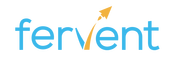
# Estimating The Total Risk of a Stock II - Applied
In this walkthrough, you'll learn how to estimate the total risk (i.e. standard deviation) of a stock.

You'll be working with the same Facebook stock data, stored in a csv file called `fb_price.csv`

In our case, the file is stored in a folder called `data`, which in turn is stored in a master folder called `iapm_python`.

In [1]:
# Import package dependencies
import pandas as pd
import numpy as np

<div class="alert alert-block alert-info">
<b>Confused by the code below?</b>  

Go back to the lecture on Calculating Stock Returns to understand the code in `In[2]` before moving on any further.
</div>


In [2]:
df = pd.read_csv("../data/fb_price.csv")
df = df[['Date', 'Adj Close']]  # Extract relevant columns only

df.rename(
    columns={'Date' : 'date', 'Adj Close' : 'price_t'},
    inplace=True)  # Rename so it's closer to PEP8 standards

df['returns'] = df['price_t'].pct_change(1)  # Calculate returns

In [3]:
df.tail()

,date,price_t,returns
1409,2017-12-22,177.199997,-0.001409
1410,2017-12-26,175.990005,-0.006828
1411,2017-12-27,177.619995,0.009262
1412,2017-12-28,177.919998,0.001689
1413,2017-12-29,176.460007,-0.008206


### The standard deviation is calculated as:  

$$\sigma_j = \sqrt{\frac{1}{n-1}\sum_{i=1}^n(r_j - E[r_j])^2}$$

Where:  
$r_j = $ Return on a stock $j$  
$E[r_j] = $ Expected Return on a stock $j$

<div class="alert alert-block alert-info">
<b>Viewing Documentation on Jupyter Notebooks</b>  

Did you know? You can view documentation for every single method or function by using Shift + Tab while inside the function / method.  
<br>
For example, to view the documentation for NumPy's .var() method:  
Type np.var() and press Shift + Tab  

You can then click the '+' icon / button to view the full documentation.  
<br>
Alternatively of course, just google the method to view the official documentation.
</div>


In [4]:
# Calculate the Variance of Facebook's returns
var_fb = np.var(df['returns'], ddof=1)

In [5]:
var_fb

0.0005468017515752956

In [6]:
# Calculate the Standard Deviation (Total Risk) of Facebook's returns
# Recall that the Standard Deviation is equal to the square root of the variance.
sd_fb = np.sqrt(var_fb)

In [7]:
sd_fb

0.023383792497695826

In [8]:
# Alternatively, calculate the Standard Deviation using NumPy's .std() method.
np.std(df['returns'], ddof=1)

0.023383792497695826

## Estimating the standard deviation 'manually'

In [9]:
df.head()

,date,price_t,returns
0,2012-05-18,38.230000,NaN
1,2012-05-21,34.029999,-0.109861
2,2012-05-22,31.000000,-0.089039
3,2012-05-23,32.000000,0.032258
4,2012-05-24,33.029999,0.032187


In [10]:
# Calculate the deviations for each return observation
df['deviations'] = df['returns'] - df['returns'].mean()

In [11]:
df.head()

,date,price_t,returns,deviations
0,2012-05-18,38.230000,NaN,NaN
1,2012-05-21,34.029999,-0.109861,-0.111211
2,2012-05-22,31.000000,-0.089039,-0.090389
3,2012-05-23,32.000000,0.032258,0.030909
4,2012-05-24,33.029999,0.032187,0.030838


In [12]:
# Calculate the squared deviations for each observation
df['squared_deviations'] = df['deviations'] ** 2

In [13]:
df.head()

,date,price_t,returns,deviations,squared_deviations
0,2012-05-18,38.230000,NaN,NaN,NaN
1,2012-05-21,34.029999,-0.109861,-0.111211,0.012368
2,2012-05-22,31.000000,-0.089039,-0.090389,0.008170
3,2012-05-23,32.000000,0.032258,0.030909,0.000955
4,2012-05-24,33.029999,0.032187,0.030838,0.000951


In [15]:
# Sum of squared deviations
sum(df['squared_deviations'].dropna())

0.7720840732243174

In [16]:
# Sum of squared deviations
# Note: slight difference is due to difference in the treatment of 'floats'.
np.sum(df['squared_deviations'])

0.7720840732243168

In [17]:
sum_squared_deviations = np.sum(df['squared_deviations'])

In [18]:
# Estimate the variance as the sum of squared deviations divided by N - 1,
#     where N = len(df['squared_deviations'].dropna())
var_fb_manual = sum_squared_deviations / (len(df['squared_deviations'].dropna()) - 1)

In [19]:
var_fb_manual

0.0005468017515752952

In [20]:
var_fb

0.0005468017515752956

In [21]:
np.sqrt(var_fb_manual)

0.02338379249769582

In [22]:
sd_fb

0.023383792497695826

In [23]:
# Annualised Standard Deviation
sd_fb_annual = sd_fb * np.sqrt(250)

In [24]:
sd_fb_annual

0.3697302231273823

In [25]:
# Annualised Expected Return using the 'crude' method
(df['returns'].mean()) * 250

0.33736546468750195

In [26]:
# Annualised Expected Return using the 'sophisticated' method
(1 + df['returns'].mean()) ** 250 - 1

0.40093243279785296